In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12596\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the MINMAX PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_MinMaxScaler_data2.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,priceUSD
0,0,1.752599,0.0495
1,1,1.676981,0.0726
2,2,1.721422,0.0859
3,3,1.761990,0.0783
4,4,1.588690,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,priceUSD
0,1.752599,0.0495
1,1.676981,0.0726
2,1.721422,0.0859
3,1.761990,0.0783
4,1.588690,0.0767
...,...,...
1551,-0.361936,393.7880
1552,-0.349965,386.2650
1553,-0.340271,379.4510
1554,-0.341763,384.7020


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = regressor.predict(X_test)

### Accuracy on linear regression

In [13]:
train_score = regressor.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = regressor.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 3.673758667097915
Test score of trained model: 2.7731182498656026


In [14]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = mean_absolute_error(y_test, y_pred)
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test))*100
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [15]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,48822.408640
1,RMSE,220.957934
2,MAE,174.470474
3,MAPE,8763.570248
4,r2,0.027731
5,adj_r2,0.024595


### Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(X_train, y_train)

pred = ridge.predict(X_test)

train_score = ridge.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 3.6737550006757713
Test score of trained model: 2.77479617217512


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [17]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,48821.566072
1,RMSE,220.956027
2,MAE,174.459875
3,r2,0.027748
4,adj_r2,0.024612


### Lasso Regression

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.001, normalize=True)
lasso.fit(X_train, y_train)

pred = lasso.predict(X_test)

train_score = lasso.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lasso.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 3.6737567245434644
Test score of trained model: 2.774340751868276


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [19]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,48821.794761
1,RMSE,220.956545
2,MAE,174.462759
3,r2,0.027743
4,adj_r2,0.024607


### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
pred=grid_GBR.predict(X_test)
train_score = grid_GBR.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = grid_GBR.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 54.59064796144739
Test score of trained model: 40.01091416868441


In [23]:
k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,30123.476241
1,RMSE,173.561160
2,MAE,108.096738
3,r2,0.400109
4,adj_r2,0.398174


In [24]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.1)

 The best score across ALL searched params:
 0.4574256132829748

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}


### Training the Random forest regression model on the whole dataset

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [26]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    k = X_test.shape[1]
    n = len(X_test)

    MSE = mean_squared_error(y_test, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

    results = [MSE, RMSE, MAE, r2, adj_r2]
    metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

    table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
    print(table_results)
    return y_test,y_predict

In [27]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.2560566259021948
   Metric         Score
0     MSE  37357.062945
1    RMSE    193.279753
2     MAE    105.718927
3      r2      0.256057
4  adj_r2      0.253657
Best Score: 0.38246774297351116
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 20}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.23938165751840335
   Metric         Score
0     MSE  38194.395281
1    RMSE    195.433864
2     MAE    104.732069
3      r2      0.239382
4  adj_r2      0.236928
Best Score: 0.38913268504951637
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  2
--------------
R2 score: 0.12752324642415713
   Metric         Score
0     MSE  43811.357337
1    RMSE    209.311627
2     MAE    111.868907
3      r2      0.127523
4  adj_r2      0.124709
Best Score: 0.39252449045285115
Best params: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 10}
Loop:  3
--------------
R2 score: 0.22517121640981308
   Metric         Score
0     MSE  38907.971558
1    RMSE    197.251037
2     MAE    105.715697
3      r2      0.225171
4  adj_r2      0.222672
Best Score: 0.3876717852379544
Best params: {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 30}
Loop:  4
--------------
R2 score

### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 170.0639 - mean_absolute_error: 165.5723 - val_loss: 129.3614 - val_mean_absolute_error: 128.0755
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.8650 - mean_absolute_error: 165.3724 - val_loss: 127.6520 - val_mean_absolute_error: 127.3988
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 162.3528 - mean_absolute_error: 161.3509 - val_loss: 123.5014 - val_mean_absolute_error: 122.3578
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 160.9688 - mean_absolute_error: 160.0198 - val_loss: 123.2342 - val_mean_absolute_error: 122.3380
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 160.6939 - mean_absolute_error: 159.8285 - val_loss: 123.1680 - val_mean_absolute_error: 122.4085
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 160.5733 - mean_absolute_error: 159.7764 - val_loss: 122.9332 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 114.2946 - mean_absolute_error: 108.0585 - val_loss: 79.9882 - val_mean_absolute_error: 73.8473
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 114.4820 - mean_absolute_error: 108.3826 - val_loss: 79.3962 - val_mean_absolute_error: 73.3836
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 113.6597 - mean_absolute_error: 107.6396 - val_loss: 79.5086 - val_mean_absolute_error: 73.6801
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 113.5211 - mean_absolute_error: 107.7327 - val_loss: 81.7771 - val_mean_absolute_error: 76.0793
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 113.3172 - mean_absolute_error: 107.5901 - val_loss: 80.7187 - val_mean_absolute_error: 75.0776
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 114.0139 - mean_absolute_error: 108.4258 - val_loss: 79.6719 - val_mean_abso

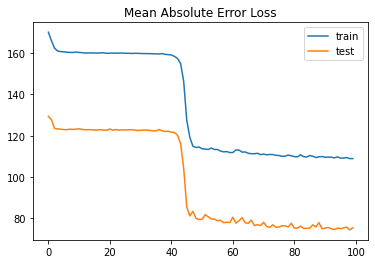

In [15]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 2

In [16]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [17]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [18]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 170.1006 - mean_absolute_error: 165.5663 - val_loss: 129.3607 - val_mean_absolute_error: 128.0690
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 165.9181 - mean_absolute_error: 165.4461 - val_loss: 128.0117 - val_mean_absolute_error: 127.9158
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 165.2767 - mean_absolute_error: 165.2161 - val_loss: 127.6492 - val_mean_absolute_error: 127.5912
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 163.7077 - mean_absolute_error: 163.3138 - val_loss: 123.6020 - val_mean_absolute_error: 122.6205
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 160.9270 - mean_absolute_error: 160.1685 - val_loss: 123.1597 - val_mean_absolute_error: 122.5255
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 160.7367 - mean_absolute_error: 160.1105 - val_loss: 123.2571 - val_mean

Epoch 49/100
63/63 [==============================] - 0s 2ms/step - loss: 159.7891 - mean_absolute_error: 159.2502 - val_loss: 122.7227 - val_mean_absolute_error: 122.1710
Epoch 50/100
63/63 [==============================] - 0s 2ms/step - loss: 159.6211 - mean_absolute_error: 159.0887 - val_loss: 122.5577 - val_mean_absolute_error: 122.0206
Epoch 51/100
63/63 [==============================] - 0s 2ms/step - loss: 159.5490 - mean_absolute_error: 158.9946 - val_loss: 122.6292 - val_mean_absolute_error: 122.0462
Epoch 52/100
63/63 [==============================] - 0s 2ms/step - loss: 159.5611 - mean_absolute_error: 158.9326 - val_loss: 122.5347 - val_mean_absolute_error: 121.9053
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 159.4439 - mean_absolute_error: 158.8000 - val_loss: 122.3540 - val_mean_absolute_error: 121.7170
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 159.3687 - mean_absolute_error: 158.7099 - val_loss: 122.4015 - va

63/63 [==============================] - 0s 2ms/step - loss: 108.4956 - mean_absolute_error: 105.2508 - val_loss: 74.5893 - val_mean_absolute_error: 71.3534
Epoch 98/100
63/63 [==============================] - 0s 2ms/step - loss: 108.6354 - mean_absolute_error: 105.3958 - val_loss: 74.3499 - val_mean_absolute_error: 71.0924
Epoch 99/100
63/63 [==============================] - 0s 2ms/step - loss: 108.3195 - mean_absolute_error: 105.0847 - val_loss: 73.7570 - val_mean_absolute_error: 70.5282
Epoch 100/100
63/63 [==============================] - 0s 2ms/step - loss: 108.3930 - mean_absolute_error: 105.1616 - val_loss: 73.7943 - val_mean_absolute_error: 70.5892


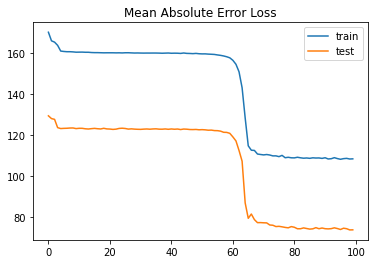

In [19]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 3

In [20]:
#mean_squared_logarithmic_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [21]:
classifier.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mse'])

In [22]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 5ms/step - loss: 19.6621 - mse: 94882.8672 - val_loss: 14.2739 - val_mse: 65620.1016
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 14.4489 - mse: 94796.7344 - val_loss: 10.0218 - val_mse: 65314.6328
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 8.3191 - mse: 92740.5234 - val_loss: 5.3477 - val_mse: 61848.0117
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 5.9229 - mse: 89403.3750 - val_loss: 4.5670 - val_mse: 60494.1523
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 5.2915 - mse: 88307.4922 - val_loss: 4.2386 - val_mse: 59733.5195
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 4.9802 - mse: 87570.9688 - val_loss: 4.0172 - val_mse: 59357.4453
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 4.7220 - mse: 86700.5078 - val_loss: 3.8219 - val_mse: 59171.3125
Epoch 8/100
63/63 [====

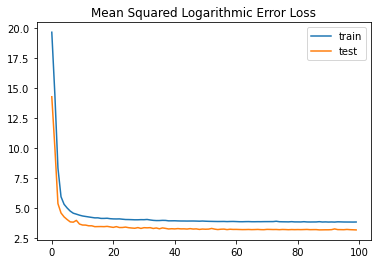

In [23]:
# plot loss during training
plt.title('Mean Squared Logarithmic Error Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Model 4

In [24]:
# define model for MSE Loss
#mean_squared_error
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [25]:
classifier.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [26]:
history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 93909.2812 - mse: 93901.7500 - val_loss: 60216.0469 - val_mse: 60204.2539
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 73840.0312 - mse: 73822.6172 - val_loss: 47363.3516 - val_mse: 47343.9453
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 67910.1094 - mse: 67889.1172 - val_loss: 47499.3281 - val_mse: 47477.0859
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 66820.7109 - mse: 66797.4844 - val_loss: 46651.1602 - val_mse: 46626.6719
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 65745.2188 - mse: 65719.2812 - val_loss: 45850.2539 - val_mse: 45823.3047
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 64411.5820 - mse: 64383.5781 - val_loss: 45620.3398 - val_mse: 45591.1641
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 62986.4102 - mse: 62956.1523 - 

Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 40579.5547 - mse: 40532.1836 - val_loss: 26147.5254 - val_mse: 26099.9746
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 40914.5586 - mse: 40867.0469 - val_loss: 25477.3203 - val_mse: 25429.7207
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 40558.5898 - mse: 40510.9922 - val_loss: 24156.3906 - val_mse: 24109.0371
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 40752.8203 - mse: 40705.2109 - val_loss: 24954.9570 - val_mse: 24907.3203
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 40663.4648 - mse: 40615.8125 - val_loss: 25864.7129 - val_mse: 25816.8887
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 40287.6406 - mse: 40239.8672 - val_loss: 24431.6973 - val_mse: 24384.0723
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 40408.0547 - mse: 40360.

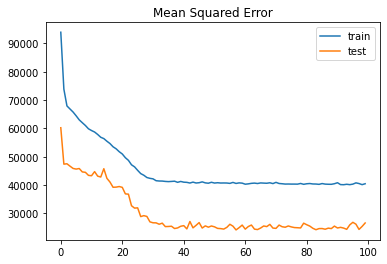

In [27]:
# plot loss during training
plt.title('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()